In [36]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
!pip install scipy
!pip install gdown

In [37]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

import scipy.stats as stats
from sklearn.impute import SimpleImputer as Imputer

import gdown

In [38]:
file_id = "13elVDJJ6JUH2gsj36CxPjkLryE2rnl-r"
url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(url, "flight_data.csv", quiet=False)

flight_data = pd.read_csv("flight_data.csv")

Downloading...
From (original): https://drive.google.com/uc?id=13elVDJJ6JUH2gsj36CxPjkLryE2rnl-r
From (redirected): https://drive.google.com/uc?id=13elVDJJ6JUH2gsj36CxPjkLryE2rnl-r&confirm=t&uuid=3202cb08-6623-436c-9a2c-b28d8da5a8ec
To: /content/flight_data.csv
100%|██████████| 1.32G/1.32G [00:23<00:00, 56.6MB/s]


In [39]:
flight_data.shape
flight_data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,...,CANCELLATION_CODE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,index
0,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10423,...,NaN,95.0,103.0,619.0,7.0,0.0,8.0,0.0,0.0,0
1,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10423,...,NaN,100.0,106.0,619.0,0.0,0.0,0.0,0.0,0.0,1
2,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10800,...,NaN,130.0,110.0,672.0,0.0,0.0,0.0,0.0,0.0,2
3,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10821,...,NaN,215.0,216.0,1670.0,14.0,0.0,1.0,0.0,0.0,3
4,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",11259,...,NaN,105.0,98.0,580.0,0.0,0.0,0.0,0.0,0.0,4


In [40]:
print(flight_data.columns.tolist())

['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'MKT_CARRIER_AIRLINE_ID', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_NAME', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_NAME', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP', 'ARR_TIME', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'CANCELLED', 'CANCELLATION_CODE', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'index']


In [41]:
#Goal: See how often each delay reason occurs and how big they tend to be.
delay_cols = ['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']

# Check missingness
flight_data[delay_cols].isna().sum()

# Summary stats
flight_data[delay_cols].describe()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
count,7.546988e+06,7.546988e+06,7.546988e+06,7.546988e+06,7.546988e+06
mean,4.995800e+00,9.005415e-01,2.742626e+00,2.418462e-02,5.974389e+00
std,3.550577e+01,1.585831e+01,1.530997e+01,1.390774e+00,3.163105e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.689000e+03,2.419000e+03,2.700000e+03,1.164000e+03,2.690000e+03


Text(0.5, 1.0, 'Distribution of Delay Minutes by Reason')

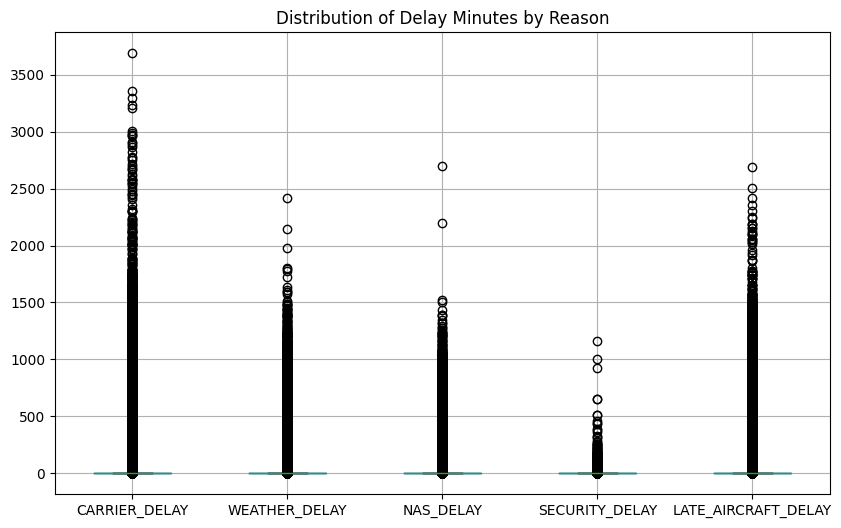

In [42]:
flight_data[delay_cols].boxplot(figsize=(10,6))
plt.title("Distribution of Delay Minutes by Reason")

##Frequency and Contribution of Each Delay Type

Compute the proportion of total delay minutes that each reason accounts for.

computer

([0, 1, 2, 3, 4],
 [Text(0, 0, 'LATE_AIRCRAFT_DELAY'),
  Text(1, 0, 'CARRIER_DELAY'),
  Text(2, 0, 'NAS_DELAY'),
  Text(3, 0, 'WEATHER_DELAY'),
  Text(4, 0, 'SECURITY_DELAY')])

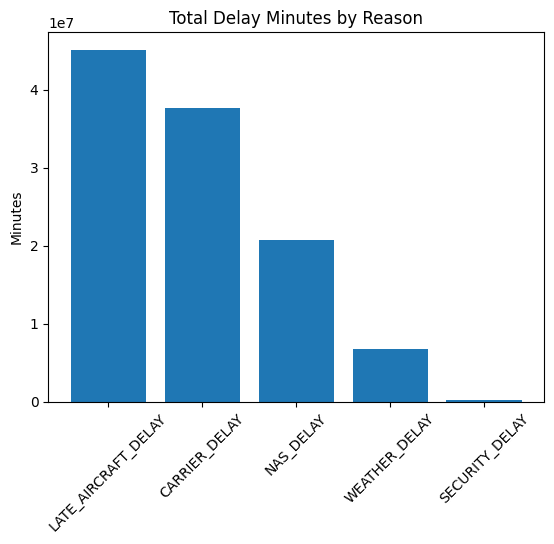

In [43]:
total_delay = flight_data[delay_cols].sum().sort_values(ascending=False)
plt.bar(total_delay.index, total_delay.values)
plt.title("Total Delay Minutes by Reason")
plt.ylabel("Minutes")
plt.xticks(rotation=45)

<Axes: >

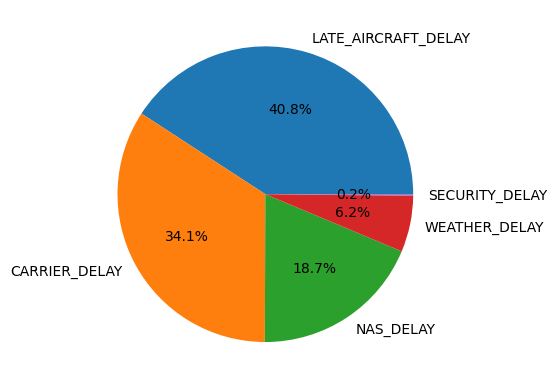

In [44]:
(total_delay / total_delay.sum()).plot(kind='pie', autopct='%1.1f%%')

##Relationship Between Delay Reason and Day/Month/Season

To see when different delay types are most common.

Text(0, 0.5, 'Minutes')

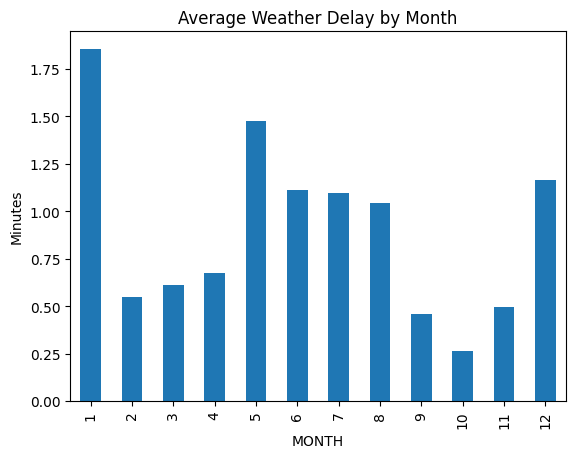

In [65]:
flight_data.groupby('MONTH')['WEATHER_DELAY'].mean().plot(kind='bar')
plt.title("Average Weather Delay by Month")
plt.ylabel("Minutes")

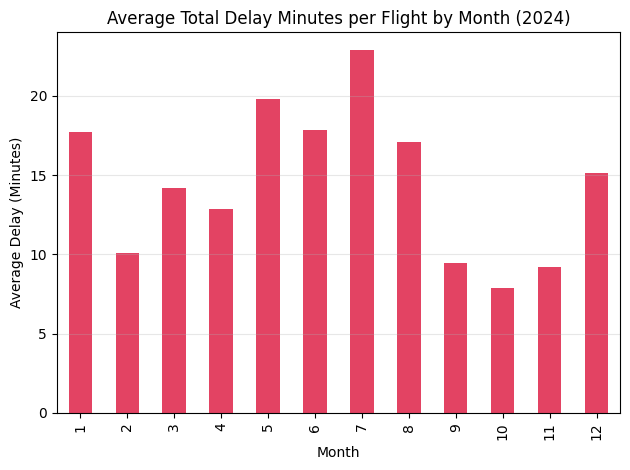

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

# Exclude SECURITY_DELAY if desired
delay_cols_no_security = [c for c in delay_cols if c != 'SECURITY_DELAY']

# Compute total delay per flight (sum across delay types)
flight_data['TOTAL_DELAY_MIN'] = flight_data[delay_cols_no_security].sum(axis=1)

# Group by month and compute average delay
avg_delay_by_month = flight_data.groupby('MONTH')['TOTAL_DELAY_MIN'].mean()

# Plot
plt.figure()
avg_delay_by_month.plot(kind='bar', color='crimson', alpha=0.8)

plt.title("Average Total Delay Minutes per Flight by Month (2024)")
plt.ylabel("Average Delay (Minutes)")
plt.xlabel("Month")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


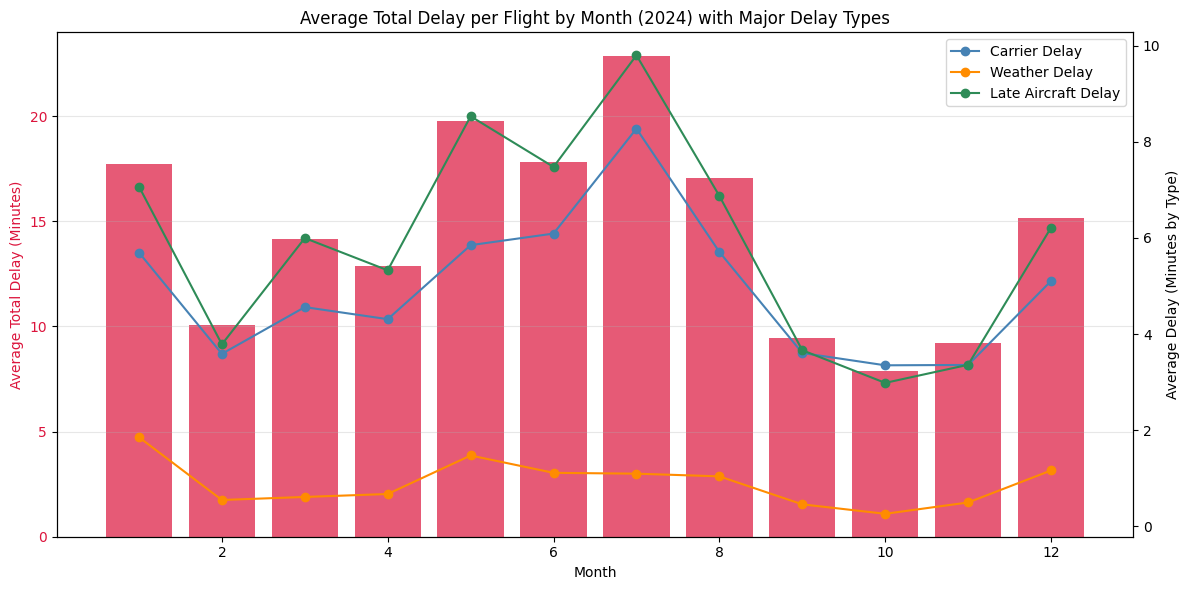

In [69]:
import matplotlib.pyplot as plt
import pandas as pd

# Exclude SECURITY_DELAY if desired
delay_cols_no_security = [c for c in delay_cols if c != 'SECURITY_DELAY']

# Compute total delay per flight (sum across delay types)
flight_data['TOTAL_DELAY_MIN'] = flight_data[delay_cols_no_security].sum(axis=1)

# Group by month
monthly = flight_data.groupby('MONTH').agg({
    'TOTAL_DELAY_MIN': 'mean',
    'CARRIER_DELAY': 'mean',
    'WEATHER_DELAY': 'mean',
    'LATE_AIRCRAFT_DELAY': 'mean'
}).reset_index()

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(12,6))

# Bar: total delay
ax1.bar(monthly['MONTH'], monthly['TOTAL_DELAY_MIN'],
        color='crimson', alpha=0.7, label='Total Delay (All Types)')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Total Delay (Minutes)', color='crimson')
ax1.tick_params(axis='y', labelcolor='crimson')

# Line: weather, carrier, and late aircraft delays
ax2 = ax1.twinx()
ax2.plot(monthly['MONTH'], monthly['CARRIER_DELAY'], color='steelblue', marker='o', label='Carrier Delay')
ax2.plot(monthly['MONTH'], monthly['WEATHER_DELAY'], color='darkorange', marker='o', label='Weather Delay')
ax2.plot(monthly['MONTH'], monthly['LATE_AIRCRAFT_DELAY'], color='seagreen', marker='o', label='Late Aircraft Delay')
ax2.set_ylabel('Average Delay (Minutes by Type)')
ax2.tick_params(axis='y')

# Style
plt.title('Average Total Delay per Flight by Month (2024) with Major Delay Types')
ax2.legend(loc='upper right')
ax1.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


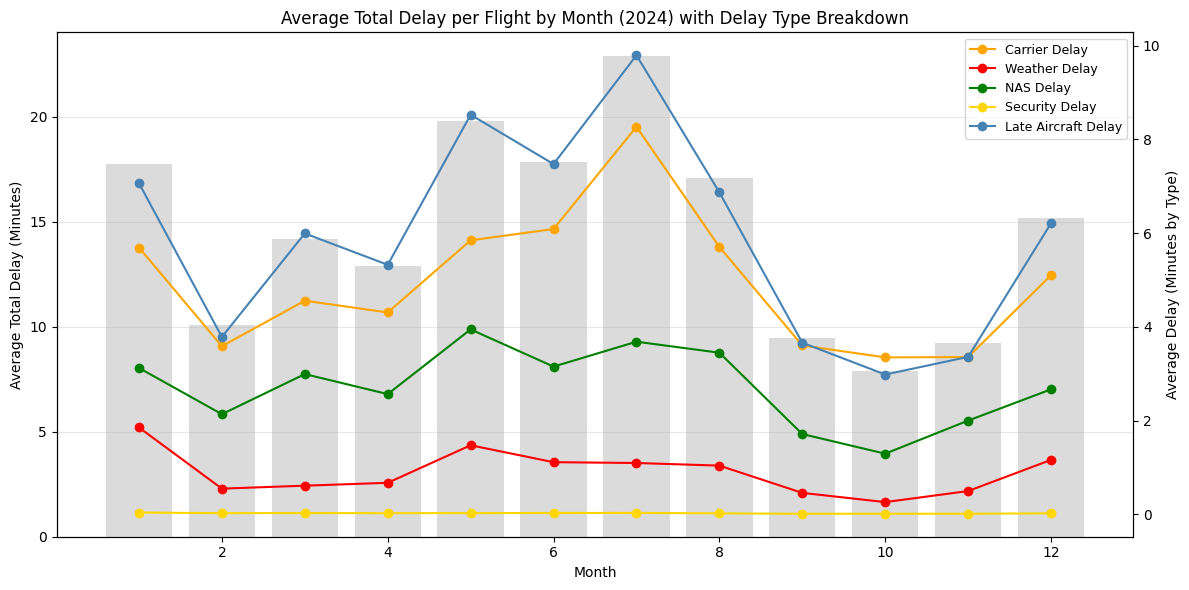

In [72]:
import matplotlib.pyplot as plt
import pandas as pd

# Compute total delay per flight (sum across delay types)
flight_data['TOTAL_DELAY_MIN'] = flight_data[delay_cols].sum(axis=1)

# Group by month and calculate averages
monthly = flight_data.groupby('MONTH').agg({
    'TOTAL_DELAY_MIN': 'mean',
    'CARRIER_DELAY': 'mean',
    'WEATHER_DELAY': 'mean',
    'NAS_DELAY': 'mean',
    'SECURITY_DELAY': 'mean',
    'LATE_AIRCRAFT_DELAY': 'mean'
}).reset_index()

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(12,6))

# Bar: total delay (gray)
ax1.bar(monthly['MONTH'], monthly['TOTAL_DELAY_MIN'],
        color='lightgray', alpha=0.8, label='Total Delay (All Types)')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Total Delay (Minutes)')
ax1.tick_params(axis='y')

# Line: delay types (color-matched to pie chart)
ax2 = ax1.twinx()
ax2.plot(monthly['MONTH'], monthly['CARRIER_DELAY'], color='orange', marker='o', label='Carrier Delay')
ax2.plot(monthly['MONTH'], monthly['WEATHER_DELAY'], color='red', marker='o', label='Weather Delay')
ax2.plot(monthly['MONTH'], monthly['NAS_DELAY'], color='green', marker='o', label='NAS Delay')
ax2.plot(monthly['MONTH'], monthly['SECURITY_DELAY'], color='gold', marker='o', label='Security Delay')
ax2.plot(monthly['MONTH'], monthly['LATE_AIRCRAFT_DELAY'], color='steelblue', marker='o', label='Late Aircraft Delay')

ax2.set_ylabel('Average Delay (Minutes by Type)')
ax2.tick_params(axis='y')

# Style
plt.title('Average Total Delay per Flight by Month (2024) with Delay Type Breakdown')
ax2.legend(loc='upper right', fontsize=9)
ax1.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Correlation Between Delay Reasons')

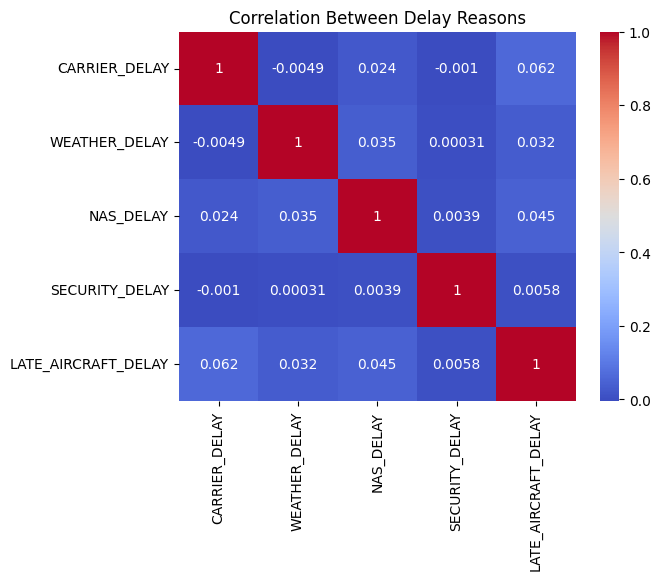

In [46]:
corr = flight_data[delay_cols].corr()
carrier_late_corr = corr.loc['CARRIER_DELAY', 'LATE_AIRCRAFT_DELAY']

# exclude self-correlations (the 1.0 diagonal)
upper_vals = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool)).stack()
mean_corr = upper_vals.mean()
median_corr = upper_vals.median()

ratio_mean = carrier_late_corr / mean_corr
ratio_median = carrier_late_corr / median_corr

print(f"Carrier–Late Aircraft correlation: {carrier_late_corr:.3f}")
print(f"Mean of other correlations: {mean_corr:.3f}")
print(f"Ratio to mean: {ratio_mean:.2f}x, Ratio to median: {ratio_median:.2f}x")


In [47]:
z_score = (carrier_late_corr - mean_corr) / upper_vals.std()
print(f"Carrier–Late Aircraft correlation z-score: {z_score:.2f}")


NameError: name 'carrier_late_corr' is not defined

Text(0, 0.5, 'Minutes')

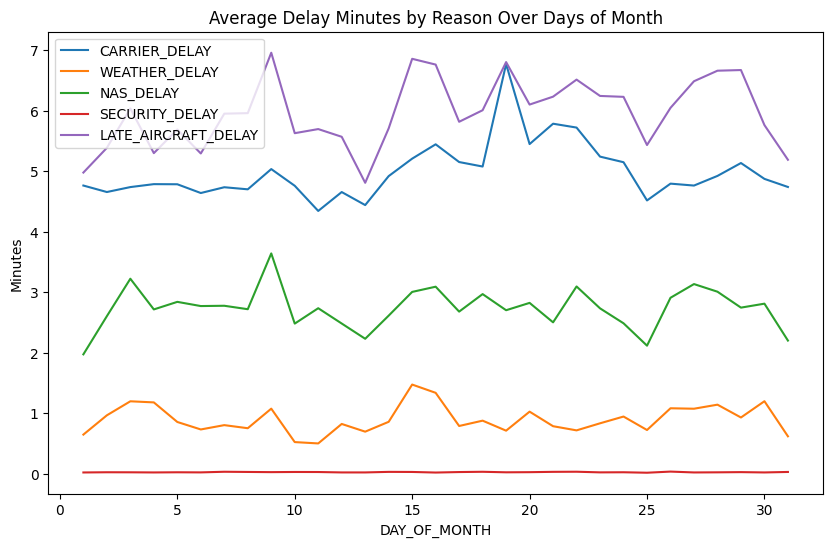

In [48]:
#line plot over time
delay_over_time = flight_data.groupby('DAY_OF_MONTH')[delay_cols].mean()
delay_over_time.plot(figsize=(10,6))
plt.title("Average Delay Minutes by Reason Over Days of Month")
plt.ylabel("Minutes")


##deeper eda

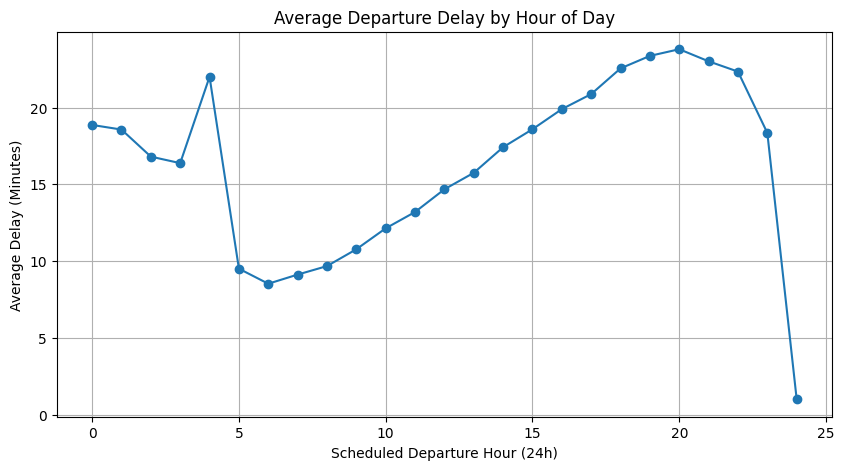

<Figure size 1000x600 with 0 Axes>

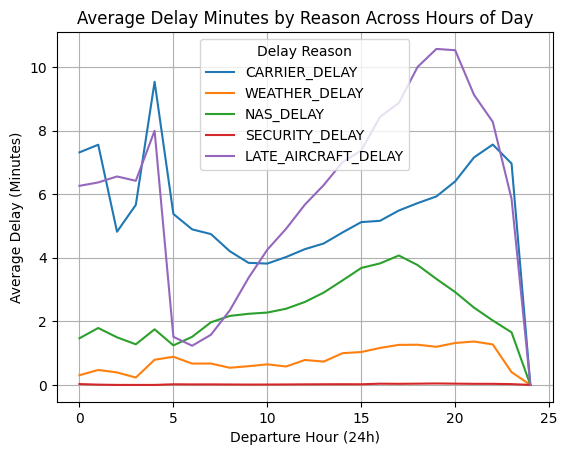

In [49]:
# Convert scheduled departure time (HHMM) to hour of day
flight_data['DEP_HOUR'] = (flight_data['CRS_DEP_TIME'] // 100).astype(int)

# 1️⃣ Average delay minutes by departure hour
delay_by_hour = flight_data.groupby('DEP_HOUR')[['DEP_DELAY_NEW']].mean()

plt.figure(figsize=(10,5))
plt.plot(delay_by_hour.index, delay_by_hour['DEP_DELAY_NEW'], marker='o')
plt.title("Average Departure Delay by Hour of Day")
plt.xlabel("Scheduled Departure Hour (24h)")
plt.ylabel("Average Delay (Minutes)")
plt.grid(True)
plt.show()

# 2️⃣ Breakdown by delay reason and hour
delay_reason_by_hour = flight_data.groupby('DEP_HOUR')[['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY']].mean()

plt.figure(figsize=(10,6))
delay_reason_by_hour.plot()
plt.title("Average Delay Minutes by Reason Across Hours of Day")
plt.xlabel("Departure Hour (24h)")
plt.ylabel("Average Delay (Minutes)")
plt.legend(title="Delay Reason")
plt.grid(True)
plt.show()

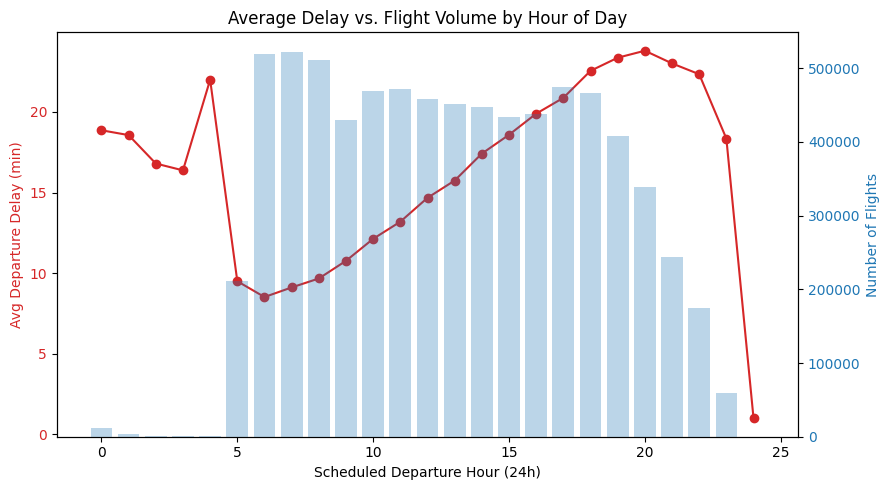

In [50]:
# Calculate average delay and flight count by hour
by_hour = flight_data.groupby('DEP_HOUR').agg({
    'DEP_DELAY_NEW': 'mean',
    'CRS_DEP_TIME': 'count'
}).rename(columns={'CRS_DEP_TIME': 'FLIGHT_COUNT'})

fig, ax1 = plt.subplots(figsize=(9,5))

# Average delay
color = 'tab:red'
ax1.set_xlabel('Scheduled Departure Hour (24h)')
ax1.set_ylabel('Avg Departure Delay (min)', color=color)
ax1.plot(by_hour.index, by_hour['DEP_DELAY_NEW'], color=color, marker='o', label='Avg Delay')
ax1.tick_params(axis='y', labelcolor=color)

# Flight count (secondary axis)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Number of Flights', color=color)
ax2.bar(by_hour.index, by_hour['FLIGHT_COUNT'], alpha=0.3, color=color, label='Flight Volume')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Average Delay vs. Flight Volume by Hour of Day")
fig.tight_layout()
plt.show()


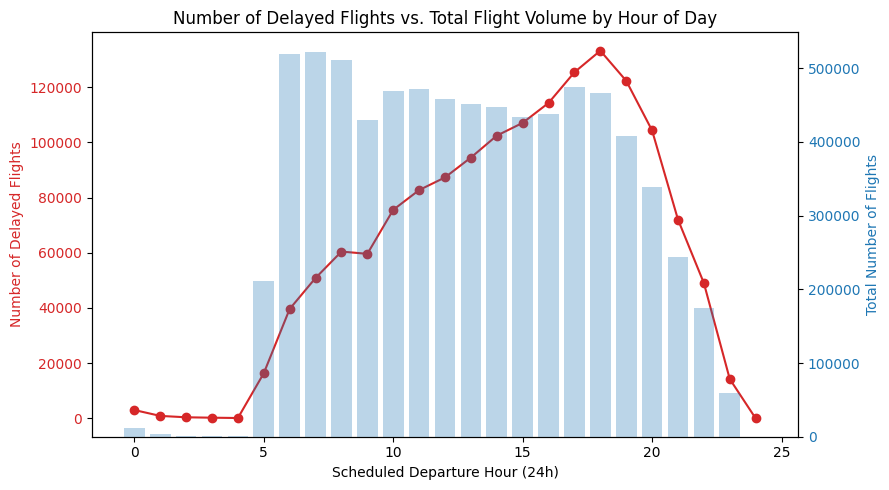

In [51]:
# Define what counts as a "delay" (e.g., >= 15 minutes)
flight_data['IS_DELAYED'] = flight_data['DEP_DELAY_NEW'] >= 15

# Group by hour: count total flights and number of delays
by_hour = flight_data.groupby('DEP_HOUR').agg({
    'IS_DELAYED': 'sum',      # number of delayed flights
    'CRS_DEP_TIME': 'count'   # total flights
}).rename(columns={'IS_DELAYED': 'NUM_DELAYED', 'CRS_DEP_TIME': 'FLIGHT_COUNT'})

# Compute proportion if desired
by_hour['PCT_DELAYED'] = by_hour['NUM_DELAYED'] / by_hour['FLIGHT_COUNT'] * 100

# Plot
fig, ax1 = plt.subplots(figsize=(9,5))

# 1️⃣ Number of delayed flights (red line)
color = 'tab:red'
ax1.set_xlabel('Scheduled Departure Hour (24h)')
ax1.set_ylabel('Number of Delayed Flights', color=color)
ax1.plot(by_hour.index, by_hour['NUM_DELAYED'], color=color, marker='o', label='Delayed Flights')
ax1.tick_params(axis='y', labelcolor=color)

# 2️⃣ Flight volume (blue bars)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Total Number of Flights', color=color)
ax2.bar(by_hour.index, by_hour['FLIGHT_COUNT'], alpha=0.3, color=color, label='Flight Volume')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Number of Delayed Flights vs. Total Flight Volume by Hour of Day")
fig.tight_layout()
plt.show()


In [52]:
flight_data['DATE'] = pd.to_datetime(
    flight_data['YEAR'].astype(str) + '-' +
    flight_data['MONTH'].astype(str) + '-' +
    flight_data['DAY_OF_MONTH'].astype(str),
    format='%Y-%m-%d',
    errors='coerce'
)


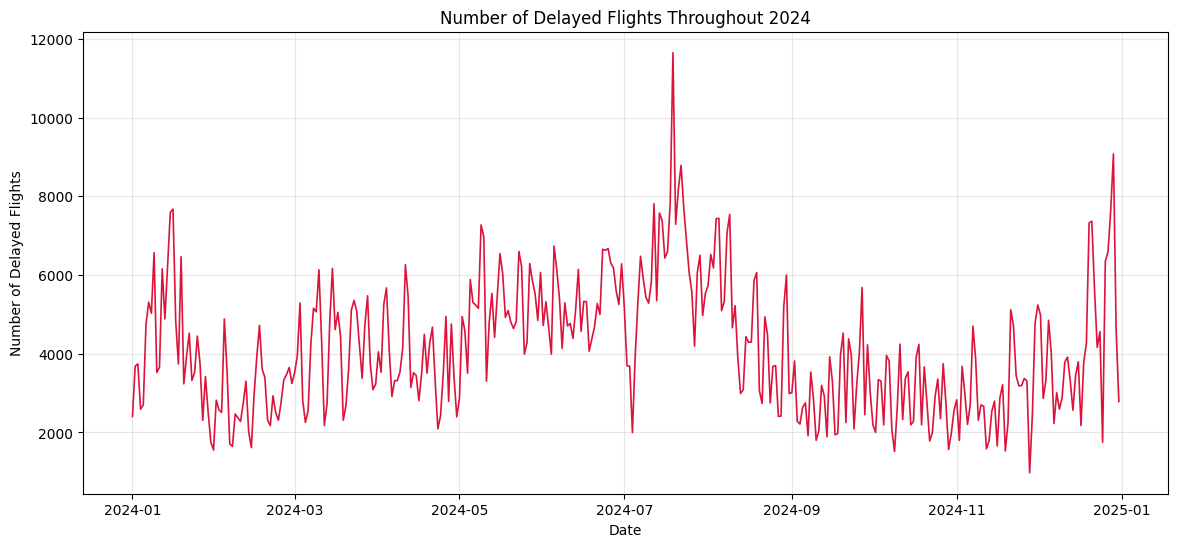

In [53]:
# Define "delayed" flights (e.g., ≥15 minutes delay)
flight_data['IS_DELAYED'] = flight_data['DEP_DELAY_NEW'] >= 15

# Create a proper datetime column for grouping
flight_data['DATE'] = pd.to_datetime(
    flight_data[['YEAR', 'MONTH', 'DAY_OF_MONTH']].rename(
        columns={'YEAR': 'year', 'MONTH': 'month', 'DAY_OF_MONTH': 'day'}
    )
)

# Aggregate total and delayed flight counts per day
daily_delay = flight_data.groupby('DATE').agg(
    TOTAL_FLIGHTS=('IS_DELAYED', 'count'),
    DELAYED_FLIGHTS=('IS_DELAYED', 'sum')
)
daily_delay['PCT_DELAYED'] = daily_delay['DELAYED_FLIGHTS'] / daily_delay['TOTAL_FLIGHTS'] * 100

# Plot: Number of delayed flights throughout 2024
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.plot(daily_delay.index, daily_delay['DELAYED_FLIGHTS'], color='crimson', linewidth=1.2)
plt.title("Number of Delayed Flights Throughout 2024")
plt.xlabel("Date")
plt.ylabel("Number of Delayed Flights")
plt.grid(True, alpha=0.3)
plt.show()


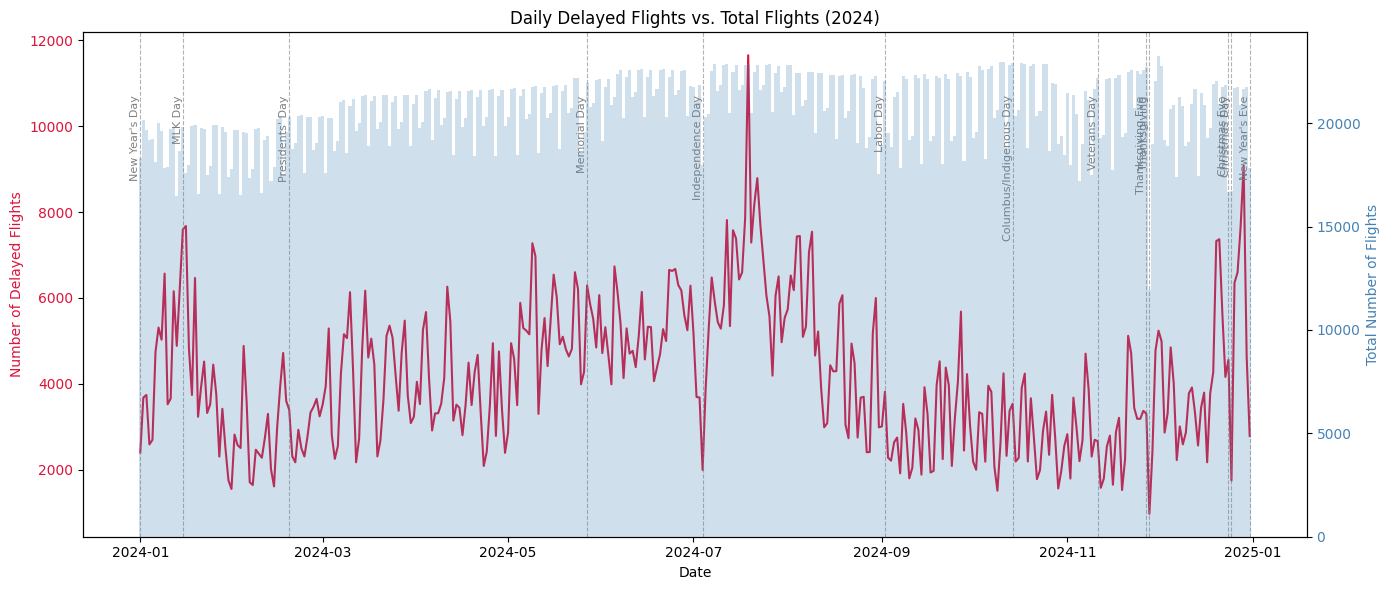

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# 1) Prep (works with your existing DF)
flight_data['IS_DELAYED'] = flight_data['DEP_DELAY_NEW'] >= 15
flight_data['DATE'] = pd.to_datetime(
    flight_data[['YEAR','MONTH','DAY_OF_MONTH']].rename(
        columns={'YEAR':'year','MONTH':'month','DAY_OF_MONTH':'day'}
    )
)

# 2) Daily aggregates
daily = flight_data.groupby('DATE').agg(
    TOTAL_FLIGHTS=('IS_DELAYED','count'),
    DELAYED_FLIGHTS=('IS_DELAYED','sum')
).reset_index()

# 3) Plot: delayed (line) + total flights (bars) with holiday markers
fig, ax1 = plt.subplots(figsize=(14,6))

# Delayed flights (left axis)
ax1.plot(daily['DATE'], daily['DELAYED_FLIGHTS'],
         color='crimson', linewidth=1.5, label='Delayed Flights')
ax1.set_ylabel('Number of Delayed Flights', color='crimson')
ax1.tick_params(axis='y', labelcolor='crimson')

# Total flights (right axis)
ax2 = ax1.twinx()
ax2.bar(daily['DATE'], daily['TOTAL_FLIGHTS'],
        color='steelblue', alpha=0.25, width=1.0, label='Total Flights')
ax2.set_ylabel('Total Number of Flights', color='steelblue')
ax2.tick_params(axis='y', labelcolor='steelblue')

ax1.set_title('Daily Delayed Flights vs. Total Flights (2024)')
ax1.set_xlabel('Date')

# 4) Significant US holidays (2024)
holidays = {
    'New Year\'s Day': '2024-01-01',
    'MLK Day': '2024-01-15',
    'Presidents\' Day': '2024-02-19',
    'Memorial Day': '2024-05-27',
    'Independence Day': '2024-07-04',
    'Labor Day': '2024-09-02',
    'Columbus/Indigenous Day': '2024-10-14',
    'Veterans Day': '2024-11-11',
    'Thanksgiving': '2024-11-28',
    'Christmas Day': '2024-12-25',
    # high-travel eves
    'Thanksgiving Eve': '2024-11-27',
    'Christmas Eve': '2024-12-24',
    'New Year\'s Eve': '2024-12-31',
}

ypos = daily['DELAYED_FLIGHTS'].max() * 0.92  # annotation height
for name, d in holidays.items():
    x = pd.to_datetime(d)
    ax1.axvline(x, color='gray', linestyle='--', alpha=0.6, linewidth=0.8)
    ax1.text(x, ypos, name, rotation=90, va='top', ha='right', fontsize=8, color='gray')

fig.tight_layout()
plt.show()


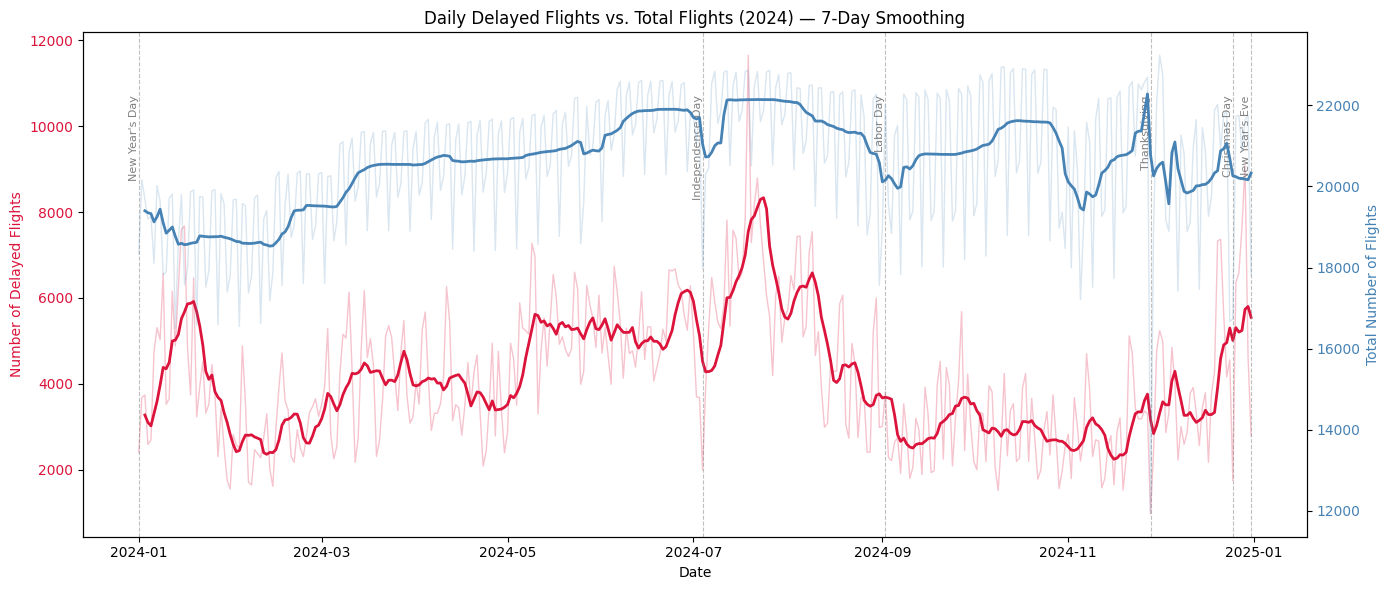

In [55]:
# --- params you can tweak ---
ROLL_WIN = 7          # light smoothing; try 5–9
MIN_PERIODS = 3       # allow edges to show
HOLY_ANNOT_FRAC = 0.92
# ----------------------------

# daily aggregates (reusing your flight_data)
flight_data['IS_DELAYED'] = flight_data['DEP_DELAY_NEW'] >= 15
flight_data['DATE'] = pd.to_datetime(
    flight_data[['YEAR','MONTH','DAY_OF_MONTH']].rename(
        columns={'YEAR':'year','MONTH':'month','DAY_OF_MONTH':'day'}
    )
)

daily = flight_data.groupby('DATE').agg(
    TOTAL_FLIGHTS=('IS_DELAYED','count'),
    DELAYED_FLIGHTS=('IS_DELAYED','sum')
).reset_index()

# light smoothing
daily['TOTAL_FLIGHTS_SMA']  = (daily['TOTAL_FLIGHTS']
                               .rolling(ROLL_WIN, min_periods=MIN_PERIODS, center=False).mean())
daily['DELAYED_FLIGHTS_SMA'] = (daily['DELAYED_FLIGHTS']
                                .rolling(ROLL_WIN, min_periods=MIN_PERIODS, center=False).mean())

# plot
fig, ax1 = plt.subplots(figsize=(14,6))

# delayed flights: raw (faint) + smoothed (bold)
ax1.plot(daily['DATE'], daily['DELAYED_FLIGHTS'], color='crimson', alpha=0.25, linewidth=1)
ax1.plot(daily['DATE'], daily['DELAYED_FLIGHTS_SMA'], color='crimson', linewidth=2,
         label=f'Delayed Flights (SMA {ROLL_WIN}d)')
ax1.set_ylabel('Number of Delayed Flights', color='crimson')
ax1.tick_params(axis='y', labelcolor='crimson')

# total flights on secondary axis: raw (faint) + smoothed (bold)
ax2 = ax1.twinx()
ax2.plot(daily['DATE'], daily['TOTAL_FLIGHTS'], color='steelblue', alpha=0.2, linewidth=1)
ax2.plot(daily['DATE'], daily['TOTAL_FLIGHTS_SMA'], color='steelblue', linewidth=2,
         label=f'Total Flights (SMA {ROLL_WIN}d)')
ax2.set_ylabel('Total Number of Flights', color='steelblue')
ax2.tick_params(axis='y', labelcolor='steelblue')

ax1.set_title(f'Daily Delayed Flights vs. Total Flights (2024) — {ROLL_WIN}-Day Smoothing')
ax1.set_xlabel('Date')

# holiday markers
holidays = {
    "New Year's Day": '2024-01-01', #'MLK Day': '2024-01-15',
    #"Presidents' Day": '2024-02-19', #'Memorial Day': '2024-05-27',
    'Independence Day': '2024-07-04', 'Labor Day': '2024-09-02',
    #'Columbus/Indigenous Day': '2024-10-14', 'Veterans Day': '2024-11-11',
    'Thanksgiving': '2024-11-28', 'Christmas Day': '2024-12-25',
    #'Thanksgiving Eve': '2024-11-27', #'Christmas Eve': '2024-12-24',
    "New Year's Eve": '2024-12-31'
}
ypos = daily['DELAYED_FLIGHTS'].max() * HOLY_ANNOT_FRAC
for name, date in holidays.items():
    x = pd.to_datetime(date)
    ax1.axvline(x, color='gray', linestyle='--', alpha=0.5, linewidth=0.8)
    ax1.text(x, ypos, name, rotation=90, va='top', ha='right', fontsize=8, color='gray')

fig.tight_layout()
plt.show()


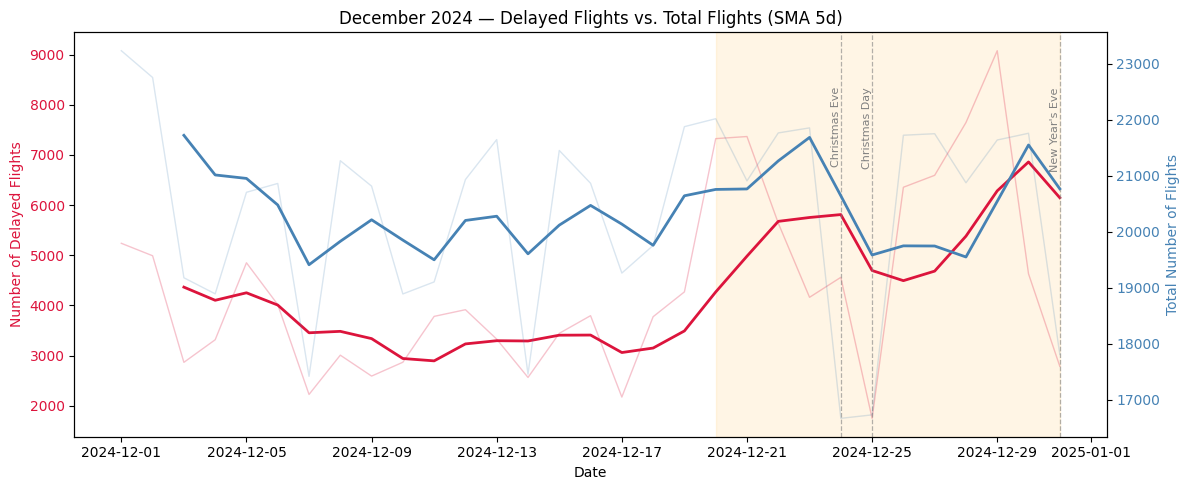

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# ---- params ----
ROLL_WIN = 5
MIN_PERIODS = 3
HOLY_ANNOT_FRAC = 0.92
# ----------------

# Ensure DATE + aggregates exist
flight_data['IS_DELAYED'] = flight_data['DEP_DELAY_NEW'] >= 15
flight_data['DATE'] = pd.to_datetime(
    flight_data[['YEAR','MONTH','DAY_OF_MONTH']].rename(
        columns={'YEAR':'year','MONTH':'month','DAY_OF_MONTH':'day'}
    )
)
daily = (flight_data.groupby('DATE')
         .agg(TOTAL_FLIGHTS=('IS_DELAYED','count'),
              DELAYED_FLIGHTS=('IS_DELAYED','sum'))
         .reset_index())

# ---- filter to December ----
mask = (daily['DATE'] >= '2024-12-01') & (daily['DATE'] <= '2024-12-31')
dec = daily.loc[mask].copy()

# light smoothing
dec['TOTAL_FLIGHTS_SMA'] = dec['TOTAL_FLIGHTS'].rolling(ROLL_WIN, min_periods=MIN_PERIODS).mean()
dec['DELAYED_FLIGHTS_SMA'] = dec['DELAYED_FLIGHTS'].rolling(ROLL_WIN, min_periods=MIN_PERIODS).mean()

# plot
fig, ax1 = plt.subplots(figsize=(12,5))

# delayed flights (left axis)
ax1.plot(dec['DATE'], dec['DELAYED_FLIGHTS'], color='crimson', alpha=0.25, linewidth=1)
ax1.plot(dec['DATE'], dec['DELAYED_FLIGHTS_SMA'], color='crimson', linewidth=2,
         label=f'Delayed Flights (SMA {ROLL_WIN}d)')
ax1.set_ylabel('Number of Delayed Flights', color='crimson')
ax1.tick_params(axis='y', labelcolor='crimson')

# total flights (right axis)
ax2 = ax1.twinx()
ax2.plot(dec['DATE'], dec['TOTAL_FLIGHTS'], color='steelblue', alpha=0.2, linewidth=1)
ax2.plot(dec['DATE'], dec['TOTAL_FLIGHTS_SMA'], color='steelblue', linewidth=2,
         label=f'Total Flights (SMA {ROLL_WIN}d)')
ax2.set_ylabel('Total Number of Flights', color='steelblue')
ax2.tick_params(axis='y', labelcolor='steelblue')

ax1.set_title(f'December 2024 — Delayed Flights vs. Total Flights (SMA {ROLL_WIN}d)')
ax1.set_xlabel('Date')

# holiday markers & shaded travel window
holidays_dec = {
    'Christmas Eve': '2024-12-24',
    'Christmas Day': '2024-12-25',
    "New Year\'s Eve": '2024-12-31'
}
ypos = dec['DELAYED_FLIGHTS'].max() * HOLY_ANNOT_FRAC
for name, d in holidays_dec.items():
    x = pd.to_datetime(d)
    ax1.axvline(x, color='gray', linestyle='--', alpha=0.6, linewidth=0.9)
    ax1.text(x, ypos, name, rotation=90, va='top', ha='right', fontsize=8, color='gray')

# optional: shade typical high-travel period (Dec 20–Jan 1)
ax1.axvspan(pd.to_datetime('2024-12-20'), pd.to_datetime('2024-12-31'),
            color='orange', alpha=0.10)

fig.tight_layout()
plt.show()


In [57]:
import pandas as pd
from datetime import timedelta

# Make sure DATE column exists and is datetime
flight_data['DATE'] = pd.to_datetime(
    flight_data[['YEAR','MONTH','DAY_OF_MONTH']].rename(
        columns={'YEAR':'year','MONTH':'month','DAY_OF_MONTH':'day'}
    )
)

# Aggregate daily total flights
daily_flights = flight_data.groupby('DATE').size().reset_index(name='TOTAL_FLIGHTS')

# Define holidays of interest
holidays = {
    'Independence Day': '2024-07-04',
    'Thanksgiving': '2024-11-28',
    'Christmas': '2024-12-25',
    'New Year\'s Day': '2024-01-01'
}

# Analyze 7 days leading up to each holiday
results = []

for name, date_str in holidays.items():
    date = pd.to_datetime(date_str)
    window_start = date - timedelta(days=7)
    window_data = daily_flights[(daily_flights['DATE'] >= window_start) & (daily_flights['DATE'] < date)]

    # Monthly average
    month_avg = daily_flights[
        daily_flights['DATE'].dt.month == date.month
    ]['TOTAL_FLIGHTS'].mean()

    results.append({
        'Holiday': name,
        'Month': date.month,
        '7-Day Pre-Holiday Avg Flights': window_data['TOTAL_FLIGHTS'].mean(),
        'Month Avg Flights': month_avg,
        'Difference': window_data['TOTAL_FLIGHTS'].mean() - month_avg,
        'Ratio (Pre-Holiday / Month Avg)': window_data['TOTAL_FLIGHTS'].mean() / month_avg
    })

pd.DataFrame(results)


,Holiday,Month,7-Day Pre-Holiday Avg Flights,Month Avg Flights,Difference,Ratio (Pre-Holiday / Month Avg)
0,Independence Day,7,21697.000000,21832.483871,-135.483871,0.993794
1,Thanksgiving,11,22281.142857,20486.566667,1794.576190,1.087598
2,Christmas,12,20694.857143,20385.290323,309.566820,1.015186
3,New Year's Day,1,NaN,18787.903226,NaN,NaN


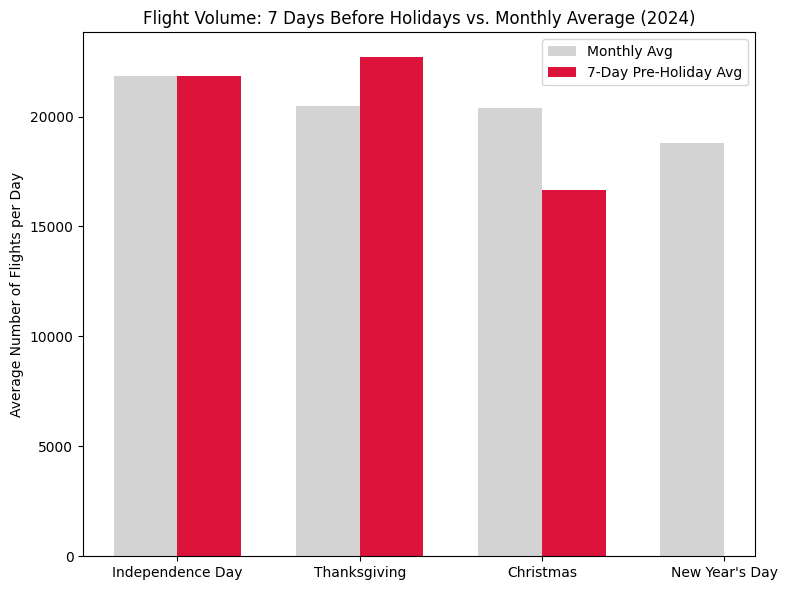

            Holiday     Month  Pre-Holiday Avg Flights  Monthly Avg Flights  \
0  Independence Day      July                  21841.0         21832.483871   
1      Thanksgiving  November                  22696.0         20486.566667   
2         Christmas  December                  16671.0         20385.290323   
3    New Year's Day   January                      NaN         18787.903226   

   Difference  Ratio  
0         8.5   1.00  
1      2209.4   1.11  
2     -3714.3   0.82  
3         NaN    NaN  


In [58]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta

# Ensure DATE column exists
flight_data['DATE'] = pd.to_datetime(
    flight_data[['YEAR','MONTH','DAY_OF_MONTH']].rename(
        columns={'YEAR':'year','MONTH':'month','DAY_OF_MONTH':'day'}
    )
)

# Aggregate daily total flights
daily_flights = flight_data.groupby('DATE').size().reset_index(name='TOTAL_FLIGHTS')

# Define holidays
holidays = {
    'Independence Day': '2024-07-04',
    'Thanksgiving': '2024-11-28',
    'Christmas': '2024-12-25',
    'New Year\'s Day': '2024-01-01'
}

# Compute rolling means and averages
results = []

for name, date_str in holidays.items():
    date = pd.to_datetime(date_str)
    window_start = date - timedelta(days=1)
    window_end = date - timedelta(days=1)
    window_data = daily_flights[
        (daily_flights['DATE'] >= window_start) & (daily_flights['DATE'] <= window_end)
    ]

    month_avg = daily_flights[
        daily_flights['DATE'].dt.month == date.month
    ]['TOTAL_FLIGHTS'].mean()

    results.append({
        'Holiday': name,
        'Month': date.strftime('%B'),
        'Pre-Holiday Avg Flights': window_data['TOTAL_FLIGHTS'].mean(),
        'Monthly Avg Flights': month_avg
    })

df_results = pd.DataFrame(results)

# --- Plot ---
plt.figure(figsize=(8,6))
bar_width = 0.35
x = range(len(df_results))

plt.bar(x, df_results['Monthly Avg Flights'], width=bar_width, color='lightgray', label='Monthly Avg')
plt.bar([i + bar_width for i in x], df_results['Pre-Holiday Avg Flights'],
        width=bar_width, color='crimson', label='7-Day Pre-Holiday Avg')

# Labels and styling
plt.xticks([i + bar_width/2 for i in x], df_results['Holiday'])
plt.ylabel('Average Number of Flights per Day')
plt.title('Flight Volume: 7 Days Before Holidays vs. Monthly Average (2024)')
plt.legend()
plt.tight_layout()
plt.show()

# Optional: print numeric comparison table
print(df_results.assign(
    Difference=(df_results['Pre-Holiday Avg Flights'] - df_results['Monthly Avg Flights']).round(1),
    Ratio=(df_results['Pre-Holiday Avg Flights'] / df_results['Monthly Avg Flights']).round(2)
))


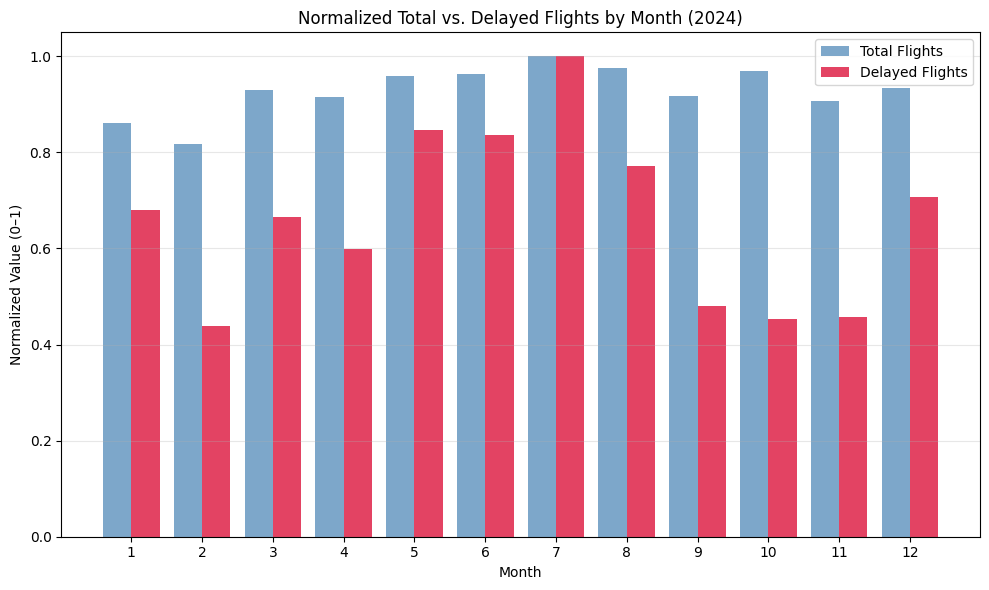

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Ensure columns exist ---
flight_data['IS_DELAYED'] = flight_data['DEP_DELAY_NEW'] >= 15
flight_data['DATE'] = pd.to_datetime(
    flight_data[['YEAR','MONTH','DAY_OF_MONTH']].rename(
        columns={'YEAR':'year','MONTH':'month','DAY_OF_MONTH':'day'}
    )
)

# --- Aggregate by month ---
monthly = flight_data.groupby('MONTH').agg(
    TOTAL_FLIGHTS=('IS_DELAYED','count'),
    DELAYED_FLIGHTS=('IS_DELAYED','sum')
).reset_index()

# --- Normalize values (0–1 range) ---
monthly['TOTAL_FLIGHTS_NORM'] = monthly['TOTAL_FLIGHTS'] / monthly['TOTAL_FLIGHTS'].max()
monthly['DELAYED_FLIGHTS_NORM'] = monthly['DELAYED_FLIGHTS'] / monthly['DELAYED_FLIGHTS'].max()

# --- Plot ---
fig, ax = plt.subplots(figsize=(10,6))
bar_width = 0.4
x = monthly['MONTH']

ax.bar(x - bar_width/2, monthly['TOTAL_FLIGHTS_NORM'],
       width=bar_width, label='Total Flights', color='steelblue', alpha=0.7)
ax.bar(x + bar_width/2, monthly['DELAYED_FLIGHTS_NORM'],
       width=bar_width, label='Delayed Flights', color='crimson', alpha=0.8)

# Style
ax.set_title('Normalized Total vs. Delayed Flights by Month (2024)')
ax.set_xlabel('Month')
ax.set_ylabel('Normalized Value (0–1)')
ax.set_xticks(range(1,13))
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
